In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# Load CIFAR-10 data
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Add a channel dimension if images are grayscale
if x_train.ndim == 3:
    x_train = np.expand_dims(x_train, axis=3)
    x_test = np.expand_dims(x_test, axis=3)

In [3]:
input_img = Input(shape=(32, 32, 3))  # CIFAR10 dimensions

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 16)          2320  

In [4]:
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

In [5]:
'''
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
                '''

'\nhistory = autoencoder.fit(x_train, x_train,\n                epochs=50,\n                batch_size=256,\n                shuffle=True,\n                validation_data=(x_test, x_test))\n                '

In [6]:
'''
decoded_imgs = autoencoder.predict(x_test)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
'''

'\ndecoded_imgs = autoencoder.predict(x_test)\n\nn = 10  # How many digits we will display\nplt.figure(figsize=(20, 4))\nfor i in range(1, n + 1):\n    # Display original\n    ax = plt.subplot(2, n, i)\n    plt.imshow(x_test[i].reshape(32, 32, 3))\n    plt.gray()\n    ax.get_xaxis().set_visible(False)\n    ax.get_yaxis().set_visible(False)\n\n    # Display reconstruction\n    ax = plt.subplot(2, n, i + n)\n    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))\n    plt.gray()\n    ax.get_xaxis().set_visible(False)\n    ax.get_yaxis().set_visible(False)\nplt.show()\n'

# **Denoising...**

---



In [7]:
noise_factor = 0.3

noisy_x_train = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
noisy_x_test = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

noisy_x_train = np.clip(noisy_x_train, 0., 1.)
noisy_x_test = np.clip(noisy_x_test, 0., 1.)

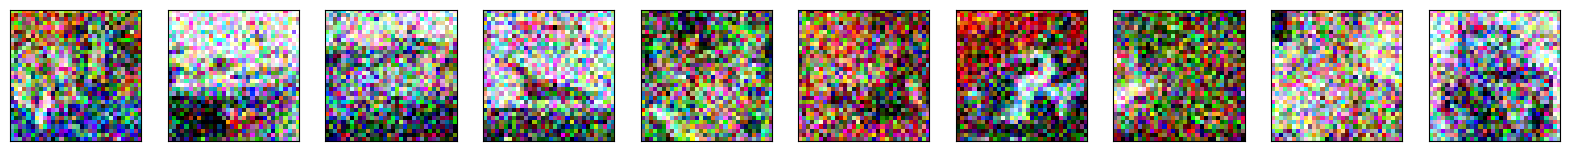

In [8]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(noisy_x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [9]:
from keras.callbacks import TensorBoard

In [10]:
autoencoder.fit(noisy_x_train, x_train,
                epochs=150,
                batch_size=128,
                shuffle=True,
                validation_data=(noisy_x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder_denoise',
                                       histogram_freq=0, write_graph=False)])

Epoch 1/150
391/391 [==============================] - 16s 22ms/step - loss: 0.5885 - val_loss: 0.5778
Epoch 2/150
391/391 [==============================] - 3s 9ms/step - loss: 0.5749 - val_loss: 0.5737
Epoch 3/150
391/391 [==============================] - 3s 9ms/step - loss: 0.5722 - val_loss: 0.5721
Epoch 4/150
391/391 [==============================] - 5s 12ms/step - loss: 0.5709 - val_loss: 0.5715
Epoch 5/150
391/391 [==============================] - 4s 9ms/step - loss: 0.5702 - val_loss: 0.5706
Epoch 6/150
391/391 [==============================] - 4s 9ms/step - loss: 0.5696 - val_loss: 0.5704
Epoch 7/150
391/391 [==============================] - 4s 10ms/step - loss: 0.5692 - val_loss: 0.5699
Epoch 8/150
391/391 [==============================] - 4s 9ms/step - loss: 0.5689 - val_loss: 0.5697
Epoch 9/150
391/391 [==============================] - 4s 9ms/step - loss: 0.5686 - val_loss: 0.5707
Epoch 10/150
391/391 [==============================] - 3s 9ms/step - loss: 0.5684 - va

313/313 [==============================] - 1s 2ms/step


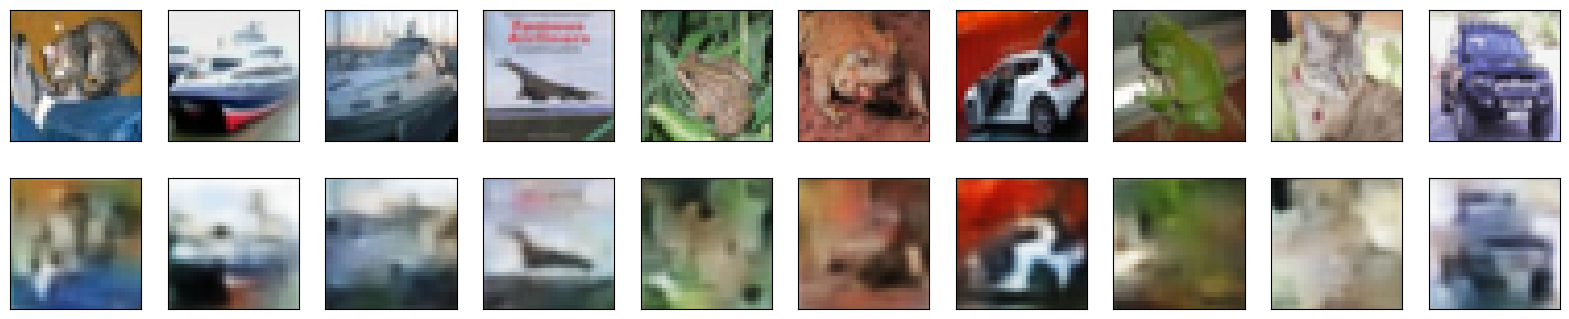

In [11]:
decoded_imgs = autoencoder.predict(noisy_x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()